![alt text](img/LM.png)
# Kurs: Warsztaty Machine learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski

### Lekcja 8. Lasy losowe (Random forest)

#### Spis treści:

1. Wprowadzenie do drzew decyzyjnych.  
2. Ensembling
3. Lasy losowe w Pythonie.

# 1. Wprowadzenie do drzew decyzyjnych
Drzewa decyzyjne to prosty do zrozumienia algorytm, który można zastosować zarówno w problemie regresji jak i klasyfikacji. Wynikiem algorytmu drzewa jest poniższy schemat, opierający się na binarnych podziałach zbioru treningowego:
<img src="img/decision_tree1.png" width="40%">


Z modelem drzew decyzyjnych wiążą się pewne pojęcia takie jak:

* Węzeł główny/początkowy (root node)
* Węzły decyzyjne (decision nodes)
* Węzły końcowe/liście (leaf nodes)


<img src="img/decision_tree2.png" width="30%">
Źródło: Źródło: Lantz, Brett. Machine learning with R. Packt Publishing Ltd, 2013.

Od razu widać następujące zalety drzew decyzyjnych:
* Nie ma znaczenia czy estymowane F(x) użyjemy bezpośrednio jako wartość do regresji czy też może jako przybliżenie prawdopodobieństwa przynależności do pewnej klasy.
* Nadają się do pracy zarówno ze zmiennymi ciągłymi jak również ze zmiennymi binarnymi lub uporządkowanymi dyskretnymi (w praktyce również z nieuporządkowanymi).
* Ostatnią zaletą jest duża łatwość interpretacji otrzymanego drzewa. Możemy bowiem prześledzić kolejne reguły pojawiające się na poszczególnych gałęziach.

Nic nie jest jednak pozbawione wad:
* Złożoność drzewa musi być bardzo duża przy pracy ze zmiennymi ciągłymi.
* Drzewo generuje "ostre" podziały co prowadzi do problemów z nadmiernym dopasowaniem.
* Duża skłonność to przetrenowania zbioru danych (liście z małą liczbą obserwacji).
* Wymagają dużych zbiorów danych.
* Brak formy funkcyjnej: trudno określić wpływ netto danej zmiennej na zjawisko.

## 1.2. Metody trenowanie drzew decyzyjnych
Skąd algorytm wie, której zmiennej użyć na danym etapie i w jakim miejscu jej rozkładu dokonać podziału? Zacznijmy od odpowiedzi na drugie pytanie.

W teorii, model musi rozważyć wszystkie możliwe podziały na każdej zmiennej objaśnianej. Dla zmiennych binarnych jest to o tyle proste, że liczba możliwość jest skończona i w praktyce mocno ograniczona. Natomiast Kiedy zmienną objasnianą jest zmienna ciągła, możemy sobie wyobrazić, że uporządkujemy kolejno obserwacje sortując po danej zmiennej. Następnie binaryzujemy naszą zmienną ciągłą i powtarzamy dla niej wyżej opisaną procedurę. Pozostaje pytanie z jakim poziomem odcięcia powinniśmy dokonać binaryzacji. W praktyce, ze względu na szybkość tej metody porównuje się rezultaty dla  określonych miejsc (centyli) rozkładu danej zmiennej ciągłej. Następnie wybiera się ten poziom który daje najlepszy wynik według przyjętego ryterium.

Teraz, kiedy już wiemy jak wybierany jest punkt odcięcia, możemy zastanowić sie nad tym, jakie kryterium jest używanego do pomiaru efektywności danego podziału. W zależności od modelowanego problemu (klasyfikacja, regresja) stosowane są nieco inne kryteria wyboru.

### 1.2.1. Problemy klasyfikacyjne

### Entropia

Algorytmów wykonujących podział drzewa w ramach węzła decyzyjnego jest bardzo wiele. Jeden z ma najpopularniejszy z nich – C5.0, opierający się o statystykę zwaną entropią.

$$Entropia(S)=\sum_{i=1}^{c}{-p_i \log_2{p_i}}$$

Gdzie: 

* S – zbiór danych, 
* c – liczba klas, 
* $𝑝_𝑖$ - frakcja obserwacji w i-tej klasie. 

Jeśli przeanalizujemy wszystkie wartości p dla klasyfikacji binarnej otrzymamy następujący wykres i z łatwością zrozumiemy sposób jej działania:

<img src="img/entropia.png" width="30%">

Z powyższego wykresu widać jasno, że Entropia przyjmuje wartości od 0 do 1, przy czym maksymalna wartość jest przyjmowana dla równego podziału obserwacji pomiędzy zmienną objaśnianą (maksymalna heterogeniczność zbioru). Entropia jest następnie wykorzystywana do pomiaru wartości informacji uzyskanej z podziału (Information Gain):

$$𝐼𝑛𝑓𝑜𝐺𝑎𝑖𝑛=𝐸𝑛𝑡𝑟𝑜𝑝𝑖𝑎(𝑆_1 )−𝐸𝑛𝑡𝑟𝑜𝑝𝑖𝑎(𝑆_2)$$

Gdzie: 
* $𝑆_1$ - to zbiór przed podziałem, 
* $𝑆_2$ - zbiór podzielony
* $𝐸𝑛𝑡𝑟𝑜𝑝𝑖𝑎(𝑆_2 )=∑_{(𝑖=1)}^{𝑘}{𝑤_𝑖 𝐸𝑛𝑡𝑟𝑜𝑝𝑖𝑎(𝑃_𝑖)}$ gdzie w to waga podzbioru proporcjonalna do liczby obserwacji, a $𝑃_𝑖$ to podzbiór zbioru $𝑆_1$

Podsumowując algorytm C5.0 typuje podział, który maksymalizuje statystykę InfoGain.

### Indeks GINI

Inną dostępą miarą jest indeks GINI, który można łatwo zrozumieć dzięki poniższemu schematowi. Indeks GINI służy w ekonomii do pomiaru nierówność - im większa polaryzacja cechy, tym wyższa jego wartość. Wzór na indeks jest następujący (dla klasyfikacji binarnej): 

$$𝐺𝐼𝑁𝐼=1 −𝑃(𝑌=1)^2−𝑃(𝑌=0)^2$$


Spróbujmy zrozumieć jego działanie na poniższym przykładzie:

<img src="img/cart3.png" width="70%">
Źródło: https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

Podział korzystając z Gender, wartości Gini:
* Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68
* Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
* Gender = (10/30)*0.68+(20/30)*0.55 = 0.59

Podział korzystając z Class, wartości Gini:
* Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51
* Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51
* Class = (14/30)*0.51+(16/30)*0.51 = 0.51

Jak widać podział korzystając z płci będzie znacznie lepszy. Własnie tę zmienną wybierzemy w pierwszej kolejności mając do wyobru takie dwie zmienne objaśniajace. Dostosowanie Gini nie jest jedyną możliwością, dostępne są inne miary (np. Chi^2). Niezależnie od tego jaki sposób podziału jest wykorzystany, idea pozostaje ta sama.

### 1.2.2 Problemy regresyjne

### SDR 

W problemach regresyjnych, podobnie jak w klasyfikacji możliwości jest wiele. Jeden najpopularniejszych to CART (Classification and Regression algorithm). Algorytm dokonuje podziału na podstawie statystyki zwanej Standard Deviation Reduction (SDR):

$$SDR=sd(T)-\sum_{i=1}^{2}{\frac{\mid{T_i}\mid}{\mid{T}\mid}} sd(T_i)$$

Gdzie: 
* T – zbiór wartości zmiennej objaśnianej w zbiorze przed podziałem, 
* $T_i$ – zbiór wartości w i-tym zbiorze po podziale,
* |.| - liczba obserwacji w w danym zbiorze
* sd(.) – odchylenie standardowe

## 1.3 Pruning drzew i hiperparametry drzew decyzyjnych
Skoro wiemy, że drzewa decyzyjne mają dużą tendencję do przetrenowywania się, to warto by pewnie narzucić im pewne ograniczenia możliwości generowania podziałów. Najczęściej spotykane hiperparametry drzew :
* maksymalna głębokość drzewa (z ang. `maxdepth`)- określa to jak wiele poziomów możemy zbudować w drzewie
* minimalna liczba obserwacji konieczna do wykonania podziału (`minsplit`)- jeżeli nasze drzewo przygląda się już tylko lokalnemu wycinkowi (mała liczba obserwacji) to nie dokona kolejnego podziału
* minimalna liczba obserwacji w liściu po podziale (`minleaf`) - jeżeli nawet przed podziałem było dużo obserwacji to podział może spowodować powstanie gałęzi/liścia z bardzo małą liczbą obserwacji.
* łączna liczba podziałów (`max nodes`),
* minimalna poprawa funkcji straty (`complexity parameter`).

# 2. Ensembling - wprowadzenie
Pomimo licznych zalet drzew decyzyjnych tendencja do nadmiernego dopasowania jest wadą, która powoduje że w codziennej praktyce prawie nigdy nie wykorzystujemy tej metody. Istnieje jednak pewien sposób na to by rozwiązać ten problem, dzięki czemu możemy zbudować bardzo skuteczny estymator.

Wiemy, że nadmierne dopasowanie może prowadzić do tego, że co prawda wartość oczekiwana błędu estymatora będzie zero, ale kosztem dużej wariancji błędu. Logicznym krokiem będzie zbudowanie bardzo wielu, lekko różnych estymatorów, tak aby wydobyć średnie oszacowanie. Powinno to pozwolić na zbliżenie się do "prawdy" i osiągnięcie małego błędu na prawdziwych danych przy jednoczesnej niskiej jego wariancji.

Jak możemy wygenerować jednak wiele estymatorów kiedy mamy tylko jeden zbiór danych i jeden algorytm? Możemy po prostu wykorzystać tylko podzbiór całego zbioru, który posiadamy. Do generowania podzbiorów służy bootstrap - losowanie próby ze zwracaniem. Ponieważ p-stwo wylosowania obserwacji do zbioru uczącego bootstrapowego, dąży do 64,2% losowane zbiory w znaczący sposób się od siebie różnią. Dokładnia taka zasada działania kryje się za bardzo przydatną metodą w machine learningu jaką jest *bagging*. 

## 2.1. Bagging

Skrót *Bagging* pochodzi ze zlepku słów *bootstrap aggregating* i jest to jedna z podstawowych metod ensemblingu (łączenia) modeli. Polega ona na uśrednianiu prognoz wielu modeli tej samej klasy (np. regresji liniowej albo drzew decyzyjnych) szacowanych na różnych próbach bootstrapowych. Dekorelację modeli otrzymujemy nie przez stosowanie różnego algorytmu, a właśnie różnych prób, na których uczony jest model.  Co ciekawe technika *baggingu* działa nawet wśród ludzi (https://www.youtube.com/watch?v=PmT2--nlbcs).

Przyjrzyjmy się temu, jak ten proces wygląda w praktyce. Jak wiemy najtrudniejszym zadaniem dla drzew jest estymacja regresyjna dla funkcji ciągłych. Poniższe ilustracje dobrze okazuję jak podobne są do siebie problemy regresji i klasyfikacji oraz jak w praktyce działa bagging.

<img src="img/bagging1.png" width="80%">
Źródło: http://www.math.usu.edu/adele/RandomForests/Ovronnaz.pdf
<img src="img/bagging2.png" width="100%">
Źródło: http://www.math.usu.edu/adele/RandomForests/Ovronnaz.pdf

## 2.2 Krytyka baggingu i algorytm lasów losowych
W praktyce okazało się, że drzewa decyzyjne szacowane w baggingu, mają taką samą strukturę, nawet jeśli prognozy na liściach się od siebie różniły. Zjawisko to jest znane w literaturze jako *tree corellation* i uniemożliwia efektywną redukcję wariancji prognoz. 

<img src="img/rf_1.png" width="70%">
Źródło: https://uc-r.github.io/random_forests

W celu przeciwdziałania nadmiernej korelacji pojedynczych modeli stworzono algorytm lasów losowych (*Random forest*). W tej wersji ensemblingu, model różnią się nie tylko zbiorem obserwacji na których są uczone, ale również są liczone na losowym podzbiorze kolumn. Dodatkowo, o ile w baggingu co do zasady losowowane są zbiory o wielkości równej zbiorowi wyjściowemu, o tyle w lesie losowym zwykle jest możliwość losowania mniejszych zbiorów celem zwiększenia losowości kolejnych modeli.

Podsumowując, w lesie losowym występują następujące hiperparametry:

* liczba/odsetek kolumn losowanych w każdej iteracji (od 1 do M gdzie M to licza kolumn),
* wielkość podzbioru bootstrapowego (<= 100% obs,)
* hiperparametry drzew (minleaf, minsplit, maxdepth, etc.)
* liczba drzew (w praktyce mało istotny parametr, zazwyczaj trenujemy model na 100+ drzewach)

Warto zauwazyć, że lasy losowe teoretycznie można zastosować do dowolnego algorytmu machine learningu. W praktyce jednak ta metoda jest stosowana jedynie do drzew decyzyjnych, ze względu na ich szybkość oraz elastyczność (w pracy ze zmiennymi kategorycznymi i nieliniowymi transformacjami zmiennych ciągłych).

## 2.3. Odmiany algorytmu drzew losowych

* Lasy losowe (algorytm Breinmana) – klasyczna i najpopularniejsza implementacja modelu.
* Extremely randomized forest – metoda opublikowana w artykule (Geurtsa et al. 2006), czasem może dać odrobinę lepsze wyniki niż klasyczne lasy losowe.
* Conditional inference forest – metoda oparta o algorytm conditional inference trees, wolniejsza, ale potencjalnie dokładniejsza od lasów losowych.
* Oblique forest – lasy losowe, w których pojedyncze podziały są wykonywane na podstawie równania liniowego wielu zmiennych, które dodatkowo jest regularyzowane (zobacz Menze et al. 2011).
* Causal Random Forest (honest causal forest) – wykorzystywane w modelowaniu eksperymentów, kiedy celem jest zaprognozowanie efektu interwencji dla nowych obserwacji.

# 3. Trenowanie lasów losowych w Pythonie

Na tym etapie powinnismy już wiedzieć wszystko to czego potrzebujemy, aby skutecznie korzystać z modelu lasów losowych. Nauczmy się teraz trenować ten algorytm w Pythonie.

## 3.1. Przygotowanie środowiska i danych

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [2]:
df_o = pd.read_csv("data/bank-balanced.csv")
print(df_o.shape)
df_o.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df_o.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
target = "deposit"
numFeatures = ['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day']
catFeatures = [ 'job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month', 'poutcome']

Z jednej strony bez problemu udało by nam się uruchomić algorytm jeżeli przygotowalibyśmy zbiór tak samo jak dla algorytmów SVM i KNN stosując one-hot encoding oraz normalizację. Zastanówmy się jednak czy na pewno potrzebujemy stosować te zabiegi.


**Normalizacja.** Skoro drzewa same wybierają punkt podziału to wydaje się, że nie ma potrzeby stosowania normalizacji zmiennych. Jeżeli pomyślimy, że drzewo szukając punktu podziału przeszukuje każdy centyl szukająć odpowiedniego poziomu to zrozumiemy, że transformacje zmieniające rozkład nie wpłyną na oczekiwnay wynik.

**One hot encoding.** Co z kolei ze zmienny kategorycznymi? Dla dostatecznie dużych zbiorów, Random Forest da radę sam wyciąć sobie odpowiednie poziomy. Skoro ma łatwość robienia ostrych cięć, to w dowolnym momencie dla wybranego poziomu jednej zmiennej może przypisać inną wartośc funkcji. Zauwazmy jednak, że istnieje inna sytuacja, w której RF automatycznie pogrupuje nam poziomy zmiennych. Przykładowo zmienna miesiąc przyjmuje 12 poziomów. Z jednej strony jest to zmienna kategoryczna, z drugiej nie jest uporządkowana. Jest tam pewien porządek, ale nie typowo monotoniczny. Z doświadczenia wiemy jednak, że zachowania ludzi grupują się razem z poszczególnymi miesiącami (pory roku wakacje/ święta etc). Dzięki temu dwoma tylko splitami drzewa możemy zgrupować ze sobą np dwa miesiące wakacyjne. W sytuacji w której zmienna miesiąc byłaby zbinaryzowana musielibyśmy mieć bardziej złozone drzewo aby uzyskać podobny efekt. Sytuacja jest jeszcze korzystniejsza, dla zmiennych uporzadkowanych (np edukacja).

Podsumowując, w przypadku zmiennych kategorycznych dla algorytmu RF ma znaczenie "porządek"/kolejność poziomów, ale nie bardzo duży. W kolejnych krokach może być warto sprawdzić jak zachowa się algorytm jak inaczej potraktujemy zmienne kategoryczne. Niemniej, musimy zamienić słowa na liczby tam gdzie to konieczne. Wykorzystamy do tego modeuł label encoder.

Label encoder służy do automatycznego mapowania poziomów na liczby całkowite. Najpierw przeanalizujmy przykładowe działanie.

In [5]:
# import narzędzia z biblioteki sklearn
from sklearn import preprocessing

In [6]:
# Inicjujemy obiekt do kodowania, który będzie przechowywał mapę wartości
le = preprocessing.LabelEncoder()
# Dopasowujemy dane (tworzymy mapę)
le.fit([1, 2, 2, 6])

LabelEncoder()

In [7]:
# Od tego momentu możemy mapę nakładać
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [8]:
# Zobaczyć jakie klasy są zmapowane (i w jakiej kolejności)
le.classes_

array([1, 2, 6])

Zobaczyć co się stanie jeżeli spróbujemy zmapować poziom, którego wcześniej nie widzieliśmy:

In [9]:
import sys # biblioteka zawiera wiele narzędzi "systemowych", np. wygodne przechwytywanie błędów
try:
    le.transform([1, 1, 2, 6, 8])
except:
    e = sys.exc_info()[0]
    print(e)

<class 'ValueError'>


Przetestujmy jeszcze, jak zachowa się funkcja jeśli klasy na wejściu będą "nie po kolei":

In [10]:
le = preprocessing.LabelEncoder()
# Dopasowujemy danę (tworzymy mapę)
le.fit([6, 2, 2, 2, 1])
print(le.transform([1, 1, 2, 6]))
print(le.classes_)

[0 0 1 2]
[1 2 6]


Jak widać label encoder sam posortował sobie poziomy. Podobnie będzie ze zmiennymi kategorycznymi opisanymi słowami:

In [11]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
print(le.transform(["paris", "paris", "tokyo", "amsterdam"]))
print(le.classes_)

[1 1 2 0]
['amsterdam' 'paris' 'tokyo']


Wykorzystajmy narzędzie na zbiorze df:

In [13]:
# Kopiowanie obiektu
df = df_o.copy()
# Słownik zawierachąch mapy
mapy = {}
for feature in catFeatures:
    # Iniciujemy obiekt do kodowania, który będzie przechowywał mapę
    le = preprocessing.LabelEncoder()
    # Dopasowujemy kolumnę (tworzymy mapę) i od razu ją nakładamy na zmienną, na której robiliśmy dopasowanie
    df[feature] = le.fit_transform(df_o[feature])
    # Zapiszmy mapę, aby móc odzyskać informację o mapowaniu i oryginalnych wartościach
    mapy[feature] = le

In [14]:
features = df.columns.tolist()
features.remove(target)
print(features)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


Zobaczmy jak możemy odzyskać oryginalne poziomy w razie potrzeby:

In [15]:
# Zobaczmy jakie klasy się utworzyły dla zmiennej  married
print(mapy['marital'].classes_)
# Zróbmy odwrócenie mapowania
print(mapy['marital'].inverse_transform(df["marital"]))
# Zobaczmy czy kolejność jest jak w oryginale
print(df_o["marital"].values)

['divorced' 'married' 'single']
['married' 'married' 'married' ... 'single' 'married' 'married']
['married' 'married' 'married' ... 'single' 'married' 'married']


## 3.2.  Przygotowanie wrappera do walidacji krzyżowej
Funkcję do tworzenia walidacji krzyżowej będziemy bazować na procedurze wykorzystanej do walidacji kNN. Tym razem, nie musimy zmieniać już prawie nic! Wystarczy modyfikacja tylko jednej linii:
```clf = RandomForestClassifier(*args, **kwargs)``` 

Na margiensie, tę łatwość zawdzięczamy organizacji kodu w bibliotece sklearn, który celowo wszędzie gdzie to możliwe wymusza tę samą strukturę obiektów aby łatwo nam je było podmieniać i pisać funkcje, wrappery i tym pdoobne. Dotyczy to zarówno obiektów korzystających do modelowania jak również liczenia metryk.

In [16]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


# Przygotujmy wrapper
def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, features=features, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # listy do przechowywania wyników:
    testResults = []
    trainResults = []
    predictions = []
    indices = []

    # Pętla walidująca model na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = RandomForestClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie dopasowania za pomocą metryki ROC-AUC
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników do listy 
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices


Jesteśmy gotowi na pierwsze uruchomienie z domyślnymi parametrami.

## 3.3. Pierwsze uruchomienie i przegląd hiperparametrów

In [17]:
trainResults, testResults, predictions, indices = CVTestRFClass(debug=True)
print(np.mean(testResults))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2020, verbose=0,
                       warm_start=False)
Train AUC: 1.0 Valid AUC: 0.9120633918342885
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_est

Pierwszym wnioskiem, jaki rzuca się w oczy jest uzyskanie w każdym przypadku dopasowania 100% na zbiorze treningowym. Widać, że drzewa w lesie losowym bardzo mocno się przetrenowywały (pozwalaliśmy na dowolną głębokość). Co więcej domyślnie uśredniać się będzie tylko 10 drzew, co nie pozwoli na osiągnięcie pełnych korzyści z RF. Zobaczmy co się stanie jeżeli jedyna zmiana, jaką zastosujemy to zwiększona liczba drzew.

In [18]:
# Pętla po parametrze n_estimators
for k in [10, 25, 50, 100, 200, 500, 1000]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

10 0.9995838573442228 0.8977571818373228 0.10182667550690006
25 0.9999872889879888 0.9104520709909532 0.08953521799703568
50 0.9999998893082228 0.915498712452151 0.08450117685607184
100 1.0 0.9172625963496941 0.08273740365030591
200 1.0 0.91835310780829 0.08164689219170995
500 1.0 0.9185454575127533 0.0814545424872467
1000 1.0 0.9186900993261761 0.08130990067382393


Jak widać Random Forest NIE przetrenowuje się mocniej wraz ze wzrostem liczby drzew. W końcu są od siebie w pełni niezależne wiec nie ma ku temu powodu. Jednocześnie obserwujemy malejące krańcowe korzyści płynące z większej liczby drzew. Wydaje się, żę spokojnie możemy poprzestać na 100 drzewach na czas dalszych eksperymentów. Nawet jeśli nie jest to wynik maksymalny, to wystarczający ze względów dydaktycznych (krócej będziemy czekać na wyniki). Zobaczmy teraz, jak głębokośc drzewa wpłynie na wyniki.

In [19]:
for k in range(2,22,2):
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

2 0.8607333808146999 0.8581649560975702 0.0025684247171297026
4 0.8936940355103637 0.8872820188275904 0.006412016682773358
6 0.9169055075144918 0.9018813751485426 0.015024132365949239
8 0.9425071143421799 0.909976013149403 0.03253110119277691
10 0.9674590740898426 0.9149029967758908 0.05255607731395173
12 0.9859798340300066 0.9159709344584902 0.07000889957151635
14 0.9960079791951113 0.9174383296955 0.07856964949961132
16 0.9994779649755341 0.9174647626442234 0.08201320233131071
18 0.9999780952041168 0.9174353744197397 0.08254272078437719
20 0.9999998994206433 0.9170144413627307 0.08298545805791258


Jak widać w przypadku tego zbioru algorytm skutecznie korzysta nawet z bardzo głębkoich drzew. Z drugiej strony, można zaobserwować jak wraz ze zwiększaniem głębokości drzew zwiększa się przetrenowanie modelu. Przyjrzyjmy się kolejnemu hiperparametrowi - liczby zmiennych w pojedynczym drzewie. O ile nie ustalimy inaczej, algorytm automatycznie ograniczy liczbę zmiennych na dane drzewo ustalać liczbę jako ```sqrt(n_features)```. Zobaczmy czy inna wartość będzie lepsza.

In [19]:
# lizczba zmiennych objaśniających
print(len(features))

16


In [20]:
for k in range(2, len(features) + 1,2):
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=k)
    print(k, np.mean(trainResults), np.mean(testResults), np.mean(trainResults) - np.mean(testResults))

2 0.9604447494954463 0.9094263605997155 0.05101838889573085
4 0.9674590740898426 0.9149029967758908 0.05255607731395173
6 0.9709138547314892 0.9142296636086881 0.0566841911228011
8 0.9726111836963962 0.9140343949185187 0.05857678877787753
10 0.9739197094454465 0.9133126989614219 0.060607010484024615
12 0.9744041433638652 0.9133894908673452 0.06101465249651994
14 0.9746075510524485 0.9130150318445273 0.06159251920792119
16 0.9746680926925398 0.9124576482662009 0.06221044442633894


Przypadkiem okazało się, że reguła kciuka (4 zmienne) to rzeczywiście najlepsza wartość. Trzeba jednak pamiętać, że nie zawsze tak będzie! Testowanie hiperparametrów to zawsze bardzo ważny krok w przypadku zaawansowanych algorytmów machine learningu.

W dwóch kolejnych pętlach sprawdzimy działanie `min_samples_split` oraz `min_samples_leaf`.

In [21]:
for k in [2, 4, 6, 8, 10, 15, 20, 30]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=4,
                                                                    min_samples_split=k)
    print(k, np.mean(testResults))

2 0.9149029967758908
4 0.9140411035587169
6 0.9146729120724991
8 0.9141739815122089
10 0.9140204901812657
15 0.9142799998393369
20 0.9138048035472158
30 0.9132202007513776


Skoro musimy mieć co najmniej 4 do splitu to po splicie możemy już przetestować wyłącznie wartości 1 i 2.

In [23]:
for k in [1, 2, 4]:
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100, max_depth=10,
                                                                    max_features=4,
                                                                    min_samples_split=6, min_samples_leaf=k)
    print(k, np.mean(testResults))

1 0.9146729120724991
2 0.9137833871964226
4 0.913460125361396


Wydaje się, że najlepszy wynik osięgnęliśmy przy głębokości 20, maksymalnej liczbie featerów 4, obserwacji przed splitem 4 i min w liściu po splicie 1. Dla tych parametrów (ale większej liczby drzew) zapiszmy predykcje naszego mdoelu i porównajmy z wczesniejszymi wynikami.

In [24]:
trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=200, max_depth=10,
                                                                    max_features=4,
                                                                    min_samples_split=4, min_samples_leaf=1)
print(k, np.mean(testResults))

modelRF = {
    "name":"RF",
    "description":"Model RF, ze zmiennymi kategorycznymi z LE",
    "specification":'n_estimators=500, max_depth=20, max_features=4, min_samples_split=4, min_samples_leaf=1',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

4 0.9146164442559062


In [25]:
import pickle

# Otwieramy plik do zapisu binarnego z wykorzystenim with
with open("model_RF_1.p", "wb") as fp:
    # Zapisujemy obiekt do wskaźnika pliku
    pickle.dump(modelRF, fp)

In [26]:
# Wczytajmy też wcześniej zapisane modele
with open("model_ekonometria_1.p", "rb") as fp:
    modelEkonometria = pickle.load(fp)
    
with open("model_svm_1.p", "rb") as fp:
    modelSVM = pickle.load(fp)
    
with open("model_kNN_1.p", "rb") as fp:
    modelkNN = pickle.load(fp)

### Porównanie wyników ze wcześniejszymi modelami
Niektórzy już pewnie zauważyli, że wielokrotne kopiowanie kodu funkcji (np tej do rysowania krzywej ROC) pomiędzy notatnikami jest niepraktyczne i kłóci się z zasadą DRY (Don't Repeat Yourself). Zobaczmy teraz jak łatwe jest importowanie w Pythonie bibliotek i funkcji tak żeby korzystać z nich wielokrotnie.

Spójrzmy na zawartośc pliku helpers.py w naszym głównym katalogu. Skopiowaliśmy tam po prostu zawartośc naszej funkcji. Dzięki temu wystarczy w tym notatniku umieścić poniższą linię, aby funkcja była już dla nas dostępna.

In [27]:
from helpers import plotROCs

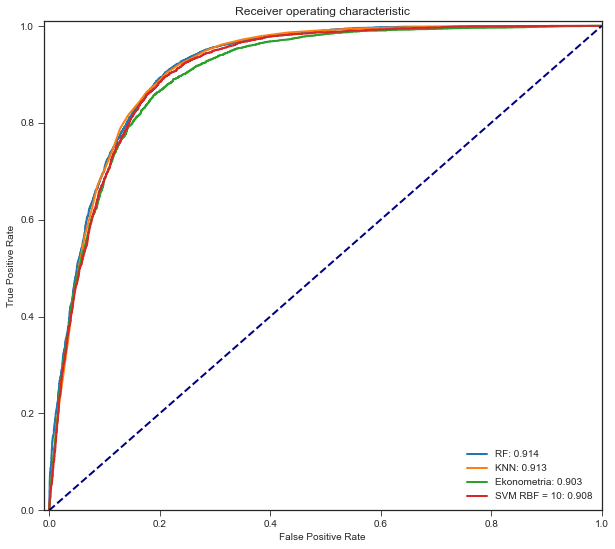

In [28]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in [modelRF, modelkNN, modelEkonometria, modelSVM]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Jak widać, dzięki lasowi losowemu uzyskano najlepszy jak dotąd wynik. Z pozostałych parametrów klasyfikatora `RandomForest` warto omówić jeszcze następujące argumenty:
* `bootstrap` - domyślnie True, jeżeli wybrane zostanie False, wyłączymy bagging, a każde drzewo będzie budowane na pełnym zbiorze danych
* `min_weight_fraction_leaf` - float, który określa jak mała może być część w liściu po splicie (od 0 do 1)
* `min_impurity_decrease` - wartość float między 0 a 1, która mówi jak bardzo musi się poprawić klasyfikacja po splicie aby można było dokonać splitu.

## 3.4 Szukanie optymalnych wartości hiperparametrów
Random forest jest pierwszy algorytmem, gdzie liczba hiperparametrów robi się na tyle zauważalna, że warto coś więcej powiedzieć o szukaniu hiperparametrów. Dwie najczęściej stosowane metody to *grid search* oraz *random search*. W pierwszym przypadku ustalamy sztywną siatkę wartości dla wszystkich analizowanych zmiennych, a w drugim, dla każdej zmiennej losujemy wartości.

Istnieje wiele bibliotek, które specjalizują się w szukaniu hiperparametrów. Zanim po nie sięgniemy warto by jednak było najpierw zobaczyć jak prosta jest samodzielna implementacja random search i jakie daje efekty.

In [29]:
# Przygotujmy listę do zapisywnia wyników
results = []

In [29]:
import random
# Teraz napiszmy pętle, w której będziemy iterować kolejne wyszukiwania.
for k in range(50):
    # Przygotujmy słownik parametrów
    # Jako punkt odniesienia do wybranych przedziałów posłużą nam wcześniejsze wyniki
    params = {
        "max_depth" : random.randint(6, 22),
        "max_features" : random.randint(2, 12),
        "min_samples_split" : random.randint(2, 9),
    }
    # Wartość min_samples_leaf musi być mniejsza niż min_samples_split
    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])
    
    # Estymacja modelu dla wylosowanych hiperparametrów
    trainResults, testResults, predictions, indices = CVTestRFClass(n_estimators=100,
                                                                    max_depth=params["max_depth"],
                                                                    max_features=params["max_features"],
                                                                    min_samples_split=params["min_samples_split"],
                                                                    min_samples_leaf=params["min_samples_leaf"])
    
    # Zapiszmy wynik
    results.append((np.mean(testResults), params.copy()))
    
    # Wyświetlmy wynik bieżącej iteracji
    print(params, np.mean(testResults))
    
    # Co 10 iteracji wyświetlmy sobie nasze dotychczasowe top 5
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, params in sorted(results, key=lambda x: x[0], reverse=True)[0:5]:
            print(params, score)
        print()

{'max_depth': 13, 'max_features': 10, 'min_samples_split': 4, 'min_samples_leaf': 4} 0.9162256842374855
{'max_depth': 21, 'max_features': 10, 'min_samples_split': 8, 'min_samples_leaf': 1} 0.9165740614697171
{'max_depth': 8, 'max_features': 5, 'min_samples_split': 4, 'min_samples_leaf': 3} 0.9099437857885648
{'max_depth': 13, 'max_features': 2, 'min_samples_split': 7, 'min_samples_leaf': 4} 0.9115410315675365
{'max_depth': 9, 'max_features': 6, 'min_samples_split': 7, 'min_samples_leaf': 3} 0.913498817859559
{'max_depth': 22, 'max_features': 7, 'min_samples_split': 8, 'min_samples_leaf': 5} 0.9178435587695954
{'max_depth': 13, 'max_features': 5, 'min_samples_split': 3, 'min_samples_leaf': 2} 0.9171856907984954
{'max_depth': 7, 'max_features': 6, 'min_samples_split': 7, 'min_samples_leaf': 3} 0.9067008534932135
{'max_depth': 6, 'max_features': 6, 'min_samples_split': 3, 'min_samples_leaf': 2} 0.9020344225773504
{'max_depth': 17, 'max_features': 2, 'min_samples_split': 9, 'min_samples_le

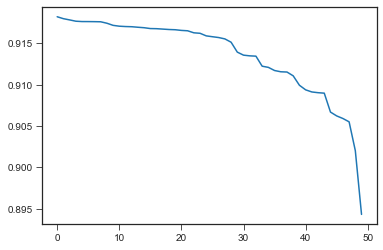

In [30]:
# Zobaczmy jak wyglądają wyniki od najlepszego graficznie
plt.plot([x for x, y in sorted(results, key=lambda x: x[0], reverse=True)])

Jak widać zdecydowana większość (60-80%) jest na relatywnie wysokim poziomie, a tylko około 20% to kiepskie wyniki. Co więcej medianowy wynik nie różni się bardzo mocno od najlepszego z wyników.

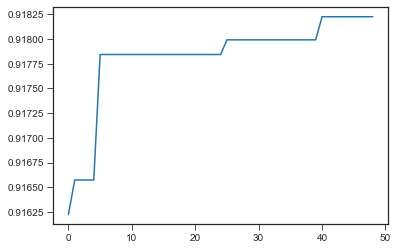

In [31]:
# Możemy tez zobaczyć jak z czasem poprawiał się najlepszy wynik:
bestHistory = []
for k in range(1,len(results)):
    # List comprehension: dla k pierwszych wartości zwróć maximum
    bestHistory.append(np.max([x for x, y in sorted(results[:k], key=lambda x: x[0], reverse=True)]))
# Wykres historii
plt.plot(bestHistory)

Powyższy wykres wyraźnie pokazuje, że już po 15 iteracjach *random search* znaleźliśmy hiperparametry, który były bardzo blisko optymalnej kombinacji znalezionej w procedurze.

## 3.5. Feature importance
W zależności od algorytmu, że obiekt zwracany przez funkcję estymującą model, ma wbudowane metody, które pomagają opracować wyniki analiz. Może to być np. zapisywanie modelu lub robienie ponownej predykcji na innych danych. W przypadku Random Forest taką dodatkową metodą jest np. *feature importance*. W związku z tym jako wynik walidacji krzyżowej warto jest przekazać również utworzone  modele. Zróbmy jeszcze jedną modyfikację funkcji walidacji krzyżowej - dodajmy parametr `saveModels = False`.

In [32]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


# Przygotujmy wrapper
def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, features=features, saveModels = False, *args, **kwargs):
    
    # Przygotujmy walidację krzyżową
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Aby oszczędzać pamięć informacja o foldach to wyłącznie numery wierszy
    testResults = []
    
    # Dla kompletności dodamy informację o w ynikach na zbiorze treningowym
    trainResults = []
    
    # Przechowajmy również predykcje dla poszczególnych foldów
    predictions = []
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    indices = []
    
    # Przygotujmy liste modeli do zachowania
    models = []
    
    # Pętla walidująca modele
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = RandomForestClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie dopasowania metryką ROC-AUC
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # zapisanie wyników z iteracji
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
        # Zapisanie wyników do listy models
        if saveModels:
            models.append(clf)
    
    # Lista zwracanych wyników - zwróćmy uwagę na nowy obiekt models
    return trainResults, testResults, predictions, indices, models

Wykonajmy trening modelu:

In [33]:
trainResults, testResults, predictions, indices, models = CVTestRFClass(n_estimators=500, max_depth=20,
                                                                    max_features=4,
                                                                    min_samples_split=4, min_samples_leaf=1,
                                                                        saveModels=True)

Dzięki zapisaniu modeli, możemy wybrać jeden z nich i zobaczyć które zmienne były najczęściej wykorzystywane w drzewach, które algorytm może uznać za najważniejsze. Zobaczmy czy wynik będzie podobny pomiędzy foldami.

Ważność zmiennych jest zwracana zgodnie z podejściem *impurity-based feature importances* czyli jest to średnia/łączna poprawa funkcji straty przez zastosowanie podziału w oparciu o daną zmienną w lesie losowym. Metryki te są mniej obiektywne, ale szeroko wykorzystywane. Wśród najlepszych metod rankingu ważności zmiennych znajdują się przede wszystkim metody permutacyjne. Istotność zmiennej mierzy się wtedy spadkiem wartości funkcji straty w pewnym zbiorze prognoz, spodowanej permutowaniem wartości tej zmiennej w ramach zbioru testowego.

In [34]:
imps = list(zip(models[0].feature_importances_, features))
imps.sort(reverse=True)
imps

[(0.3890581131768351, 'duration'),
 (0.08217577014964114, 'balance'),
 (0.08102766112571382, 'month'),
 (0.07819362432128948, 'age'),
 (0.06730735129692861, 'day'),
 (0.04889165989909755, 'contact'),
 (0.04471833497188696, 'pdays'),
 (0.037793307643543154, 'poutcome'),
 (0.03544606500027648, 'job'),
 (0.033220268296325704, 'housing'),
 (0.031953364644833185, 'campaign'),
 (0.022683025505984115, 'previous'),
 (0.01957689973235214, 'education'),
 (0.016099229950782685, 'marital'),
 (0.010637314169979106, 'loan'),
 (0.0012180101145306008, 'default')]

In [35]:
imps = list(zip(models[1].feature_importances_, features))
imps.sort(reverse=True)
imps

[(0.38267876987594335, 'duration'),
 (0.08508754054745363, 'month'),
 (0.08194437879556453, 'balance'),
 (0.07816998364268088, 'age'),
 (0.0682054938484369, 'day'),
 (0.04831179363013494, 'contact'),
 (0.04589949311710751, 'pdays'),
 (0.03698569244688108, 'poutcome'),
 (0.034962444252451805, 'job'),
 (0.0338120100380233, 'housing'),
 (0.0314370550501223, 'campaign'),
 (0.02478156071419787, 'previous'),
 (0.020000269764744456, 'education'),
 (0.016491210960269852, 'marital'),
 (0.010090183704059539, 'loan'),
 (0.001142119611928118, 'default')]

Jak widać uzyskujemy dosyć podobne wnioski jak w przypadku analizy z uzyciem algorytmu kNN. Duration hest zdecydowanie najważniejszą zmienną. Zmienne, age, day i balance również okazywały się być istotne w obydwu przypadkach.

### Ćwiczenia
* Sprawdź czy zmiana parametrów min_weight_fraction_leaf oraz min_impurity_decrease może pomóc nam poprawić nasz model.
* Na zbiorze Boston Housing przygotuj model regresyjny z wykorzystaniem Random Forest Regressor.